In [46]:
# libreria
import gdown
import pandas as pd
from textblob import TextBlob
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

#Lectura de Datos
from google.colab import drive
drive.mount('/gdrive')
drive.mount('/content/drive')

id_del_archivo = '1nDoPXe_YqDLSI6znMm6_D_f88nzz2Kmi'
url = f'https://drive.google.com/uc?id={id_del_archivo}'

# Descarga el archivo usando gdown
output = 'archivo.parquet'
gdown.download(url, output, quiet=False)
data = pd.read_parquet(output)

Mounted at /gdrive
Mounted at /content/drive


Downloading...
From: https://drive.google.com/uc?id=1nDoPXe_YqDLSI6znMm6_D_f88nzz2Kmi
To: /content/archivo.parquet
100%|██████████| 1.08M/1.08M [00:00<00:00, 113MB/s]


In [ ]:
print(data.shape)
data.head()

### **limpieza de datos**

In [ ]:
# Eliminar filas donde la columna 'answer' está vacía
data = data[data['answer'].notnull() & (data['answer'] != '')]
print(data.shape)

print(data.head())

### **Identificar tendencias en los comentarios**

Número de comentarios positivos: 664
Número de comentarios negativos: 73


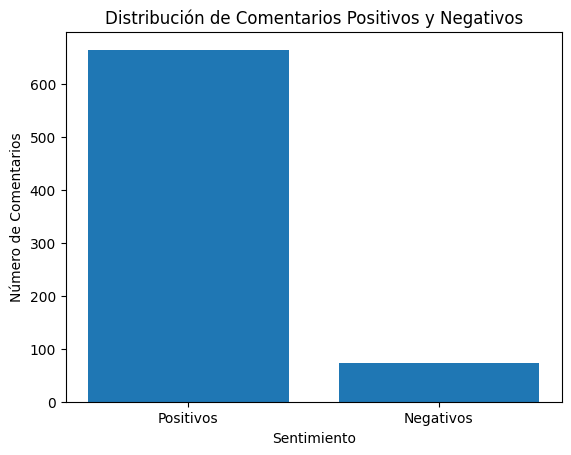

In [25]:

# Data con columna 'answer'
data['sentiment'] = data['answer'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Establecer umbral y clasificar comentarios
threshold = 0.1
data['sentiment_label'] = data['sentiment'].apply(lambda x: 'positivo' if x > threshold else ('negativo' if x < -threshold else 'neutral'))

# Análisis estadístico
positive_comments = data[data['sentiment_label'] == 'positivo']
negative_comments = data[data['sentiment_label'] == 'negativo']

print("Número de comentarios positivos:", len(positive_comments))
print("Número de comentarios negativos:", len(negative_comments))

# Visualización
plt.bar(['Positivos', 'Negativos'], [len(positive_comments), len(negative_comments)])
plt.xlabel('Sentimiento')
plt.ylabel('Número de Comentarios')
plt.title('Distribución de Comentarios Positivos y Negativos')
plt.show()


### **Modelo de tópicos**

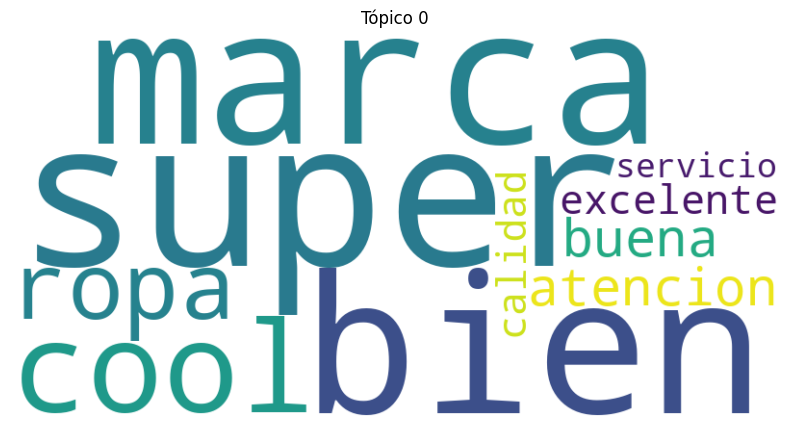

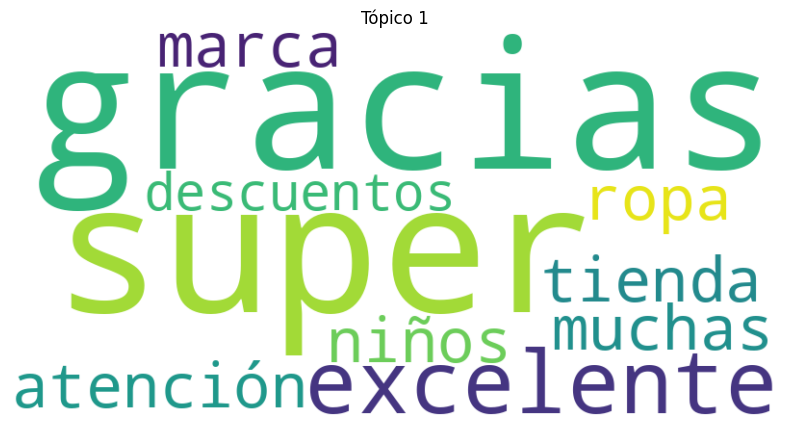

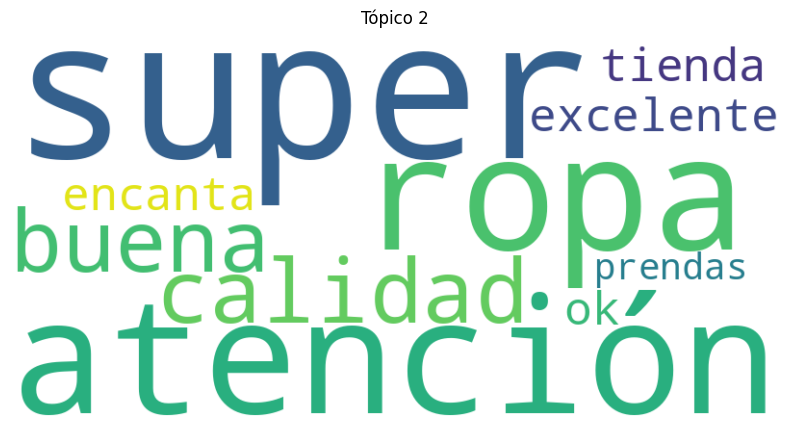

In [33]:
from wordcloud import WordCloud


# Obtener las frases clave de cada tópico
topics_phrases = []
for idx, topic in lda_model.print_topics(-1):
    phrases = [word.split('*')[1].strip().replace('"', '') for word in topic.split('+')]
    topics_phrases.append(phrases)

# Crear nubes de palabras para cada tópico
for i, phrases in enumerate(topics_phrases):
    # Unir frases en una cadena
    phrases_text = ' '.join(phrases)

    # Crear nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(phrases_text)

    # Visualizar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Tópico {i}')
    plt.show()



### **Características elogiadas más comunes**

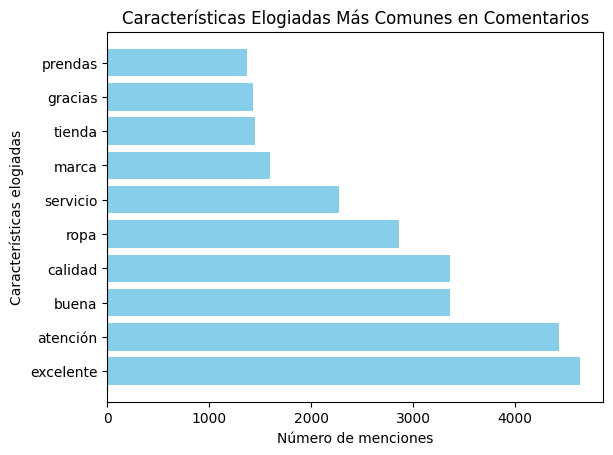

In [43]:
import spacy
from collections import Counter

# Cargar el modelo de spaCy en español
nlp = spacy.load('es_core_news_sm')

# Supongamos que 'data' es tu DataFrame con una columna 'answer'
comments = data['answer']

# Función para extraer características elogiadas
def extract_praised_features(comment):
    doc = nlp(comment)
    praised_features = [token.text.lower() for token in doc if token.pos_ == 'NOUN' or token.pos_ == 'ADJ']
    return praised_features

# Dividir los comentarios en segmentos más pequeños (por ejemplo, de 1000 caracteres cada uno)
segment_length = 1000
comment_segments = [comment[i:i+segment_length] for comment in comments for i in range(0, len(comment), segment_length)]

# Aplicar la función a todos los segmentos de comentarios
praised_features = []
for segment in comment_segments:
    praised_features.extend(extract_praised_features(segment))

# Obtener las características elogiadas más comunes
top_praised_features = Counter(praised_features).most_common(10)

# Visualizar las características elogiadas más comunes
features, counts = zip(*top_praised_features)
plt.barh(features, counts, color='skyblue')
plt.xlabel('Número de menciones')
plt.ylabel('Características elogiadas')
plt.title('Características Elogiadas Más Comunes en Comentarios')
plt.show()
